### Dataset: Superstore Sales Data

#### Objetive: 
<p>
    <li> Perform EDA. </li>
    <li> Answer questions like: En qué estado se produjeron las mayores ventas, qué producto acumula las mayores ventas, en qué mes se pueden observar las mayores ventas, cliente que acumuló la mayor cantidad de ventas, etc. </li>
    <li> Predict the sales of the next 7 days from the last date of the Training dataset. </li>
</p>

#### Link to the data: 
https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting 



In [1]:
# Import librarys:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [2]:
# conda install -c plotly plotly_express==0.4.0

In [3]:
# conda update -n base -c defaults conda

### Data acquisition 

In [4]:
# Import the data:
sales_data = pd.read_csv(r'\Users\Usuario\Desktop\Luciana\Datos\Proyectos\Superstore Sales Dataset\train.csv') # Agregar 'r' adelante de la dirección solucionó mi problema
sales_data. head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
sales_data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

##### Columns: 
<p>
    <li> Row ID </li>
    <li> Order ID </li>
    <li> Order Date </li>
    <li> Ship Date </li>
    <li> Ship Mode</li>
    <li> Customer ID </li>
    <li> Customer Name </li>
    <li> Segment</li>
    <li> Country</li>
    <li> City </li>
    <li> State </li>
    <li> Postal Code </li>
    <li> Region </li>
    <li> Product ID</li>
    <li> Category </li>
    <li> Sub-Category </li>
    <li> Product Name </li>
    <li> Sales </li>
    </p>

In [6]:
# Data Structure:
sales_data.shape

(9800, 18)

In [7]:
# Data Types:
sales_data.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [8]:
# More information:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [9]:
sales_data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

<p> We have some NULL values in the 'Postal Code' column. We'll have to treat those values and see why they're NULL. Also, we'll have to change 'Order Date', 'Ship Date', and 'Postal Code' data type. </p>

### Data Wrangling: 

In [10]:
# First, we'll drop the 'Row ID' column (We'll not use it): 
sales_data.drop(columns='Row ID',inplace=True)

In [11]:
# We'll change the data type for 'Order Date' and 'Ship Date' columns: 
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], format = '%d/%m/%Y')
sales_data['Ship Date'] = pd.to_datetime(sales_data['Ship Date'], format = '%d/%m/%Y')

In [12]:
# Check the changes:
sales_data.dtypes

Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

In [13]:
# Now, time to treat the NULL's: 
sales_data[sales_data['Postal Code'].isnull()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,CA-2018-104066,2018-12-05,2018-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,CA-2016-162887,2016-11-07,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,US-2017-150140,2017-04-06,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


<p> We can see that the missing postal code is from Burlington city. We'll see if we can find some Order ID from Burlington that has it's postal code data </p>

In [14]:
sales_data[(sales_data['City'] == 'Burlington') & (sales_data['State'] == 'Vermont')]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,CA-2018-104066,2018-12-05,2018-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,CA-2016-162887,2016-11-07,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,US-2017-150140,2017-04-06,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


<p> We couldn't find the postal code of Burlington city in our dataset. In order to complete the data, we'll search it's value on Google (according to the Internet the code is 05401). </p>

In [15]:
# We fill the missing values:
sales_data['Postal Code'].fillna(05401.0, inplace = True)

In [16]:
# Check the changes:
sales_data.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [17]:
# Now, we'll change 'Postal Code' data type to a string:
sales_data['Postal Code'] = sales_data['Postal Code'].astype(int).astype(str)

In [18]:
# We check the changes:
sales_data.dtypes

Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code              object
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

In [19]:
# We'll choose the 'Order ID' as the Index:
sales_data.set_index('Order ID')

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order ID,,,,,,,,,,,,,,,,
CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880


<p> We ended up with: 
    <li> Categorical data: 'Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Category', and 'Sub-Category'. </li>
    <li> Numeric data: 'Sales'. </li>
</p>

In [20]:
# For the categorical data, we'll see how many categories are in each of them: 
sales_data['Ship Mode'].value_counts()

Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64

<p> We have four types of shipments. Most of the dispatches were made with the standard class.  <p/>

In [21]:
sales_data['Segment'].value_counts()

Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64

In [22]:
sales_data[sales_data['Segment'] == 'Home Office'].head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
14,US-2016-118983,2016-11-22,2016-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100
15,US-2016-118983,2016-11-22,2016-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440
34,CA-2018-107727,2018-10-19,2018-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,Texas,77095,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.4720
37,CA-2016-117415,2016-12-27,2016-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,Texas,77041,Central,OFF-EN-10002986,Office Supplies,Envelopes,"#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Enve...",113.3280
38,CA-2016-117415,2016-12-27,2016-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,Texas,77041,Central,FUR-BO-10002545,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",532.3992


<p> We can see that there are three types of customers. Most of them are people who went to the store and made their purchase there. </p>

In [23]:
sales_data['Country'].value_counts()

United States    9800
Name: Country, dtype: int64

<p> All of the sales were made in USA. </p>

In [24]:
sales_data['State'].value_counts()

California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     454
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona                  223
Tennessee                183
Colorado                 179
Georgia                  177
Kentucky                 137
Indiana                  135
Massachusetts            135
Oregon                   122
New Jersey               122
Wisconsin                105
Maryland                 105
Delaware                  93
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              55
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 41
Nevada        

In [25]:
# Total of states:
len(pd.unique(sales_data['State']))

49

<p> The sales were made by customers of 49 different states. </p>

In [26]:
sales_data['City'].value_counts()

New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
                ... 
San Mateo          1
Margate            1
Kissimmee          1
Romeoville         1
Murrieta           1
Name: City, Length: 529, dtype: int64

In [27]:
sales_data['Postal Code'].value_counts()

10035    253
10024    225
10009    220
94122    195
10011    193
        ... 
77520      1
72032      1
48307      1
32127      1
92253      1
Name: Postal Code, Length: 627, dtype: int64

In [28]:
sales_data['Region'].value_counts()

West       3140
East       2785
Central    2277
South      1598
Name: Region, dtype: int64

In [29]:
sales_data['Category'].value_counts()

Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64

<p> There are 3 main category for the productos that were purchased. </p>

In [30]:
sales_data['Sub-Category'].value_counts()

Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: Sub-Category, dtype: int64

In [31]:
len(pd.unique(sales_data['Sub-Category']))

17

<p> There are 17 different sub - categories for the productos that were purchased. </p>

In [32]:
# We'll see the main descriptive statics for the 'Sales' column: 
sales_data['Sales'].describe()

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64

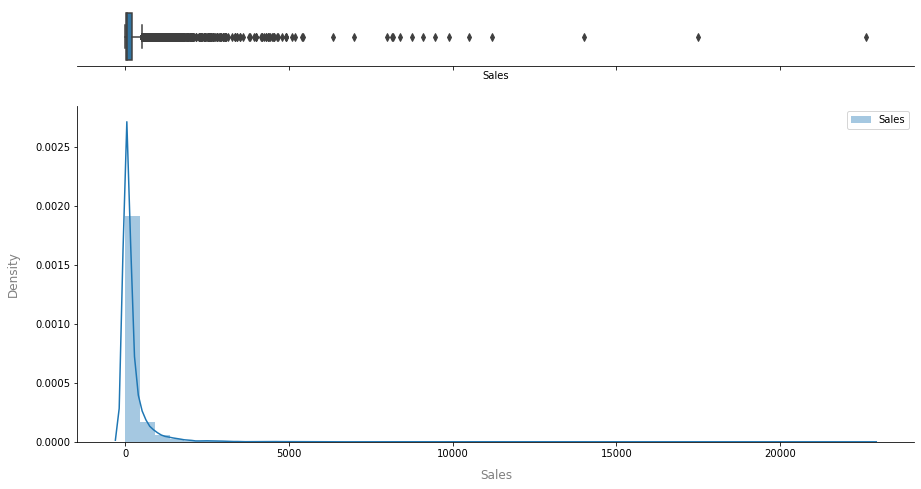

In [172]:
# We want to see the distribution of the 'Sales' data: 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(15, 8), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(sales_data['Sales'], ax=ax_box) 
sns.distplot(sales_data['Sales'], ax=ax_hist, label='Sales')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

plt.ylabel('Density', fontdict = {'fontsize': 12, 'color': 'grey'}, labelpad = 15)
plt.xlabel('Sales', fontdict = {'fontsize': 12, 'color': 'grey'}, labelpad = 10)
plt.show()

<p> We can see that most deals go from 0 to 5000 (USD$). The maximum is 22638.48 (maybe we could seek more information about this order). </p>

### Exploratory Data Analysis (EDA): 

In [206]:
# We want to know if the variables 'Ship Mode','Segment', and ' Category' (of products) are related to the sales: 
print('Ship Mode:', sales_data['Ship Mode'].unique())
print('Segment:', sales_data.Segment.unique())
print('Category:', sales_data.Category.unique())

Ship Mode: ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Segment: ['Consumer' 'Corporate' 'Home Office']
Category: ['Furniture' 'Office Supplies' 'Technology']


In [208]:
df_copy = sales_data[['Segment','Sales']]
df_copy_corr = pd.get_dummies(df_copy)

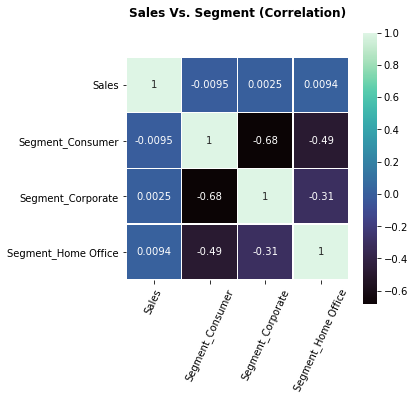

In [209]:
# Heatmap: 
correlation = df_copy_corr.corr(method="pearson")
plt.figure(figsize=(5,5)) 
ax = sns.heatmap(correlation, cbar = True, square = True, annot=True, linewidths=.5, cmap = 'mako') 
ax.set_title('Sales Vs. Segment (Correlation)', fontdict = {'fontsize': 12,'fontweight': 'bold'}, pad = 40)
plt.xticks(rotation = 65)
plt.show()

In [210]:
df_copy = sales_data[['Category','Sales']]
df_copy_corr = pd.get_dummies(df_copy)

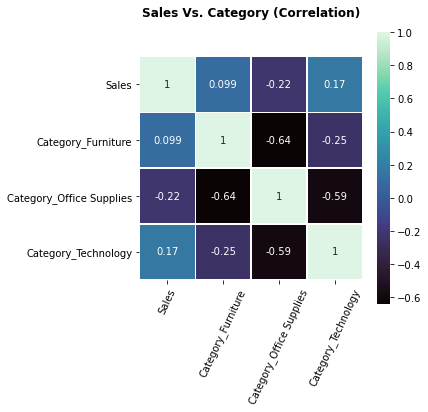

In [211]:
# Heatmap:
correlation = df_copy_corr.corr(method="pearson")
plt.figure(figsize=(5,5)) 
ax = sns.heatmap(correlation, cbar = True, square = True, annot=True, linewidths=.5, cmap = 'mako') 
ax.set_title('Sales Vs. Category (Correlation)', fontdict = {'fontsize': 12,'fontweight': 'bold'}, pad = 40)
plt.xticks(rotation = 65)
plt.show()

In [212]:
df_copy = sales_data[['Ship Mode','Sales']]
df_copy_corr = pd.get_dummies(df_copy)

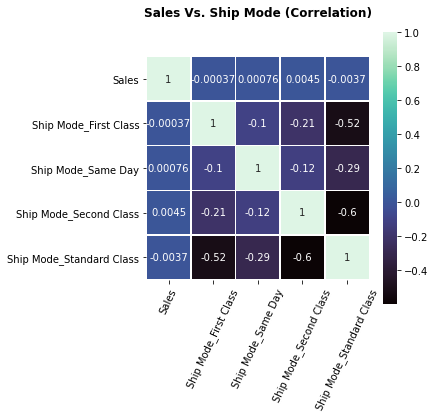

In [213]:
# Heatmap:
correlation = df_copy_corr.corr(method="pearson")
plt.figure(figsize=(5,5)) 
ax = sns.heatmap(correlation, cbar = True, square = True, annot=True, linewidths=.5, cmap = 'mako') 
ax.set_title('Sales Vs. Ship Mode (Correlation)', fontdict = {'fontsize': 12,'fontweight': 'bold'}, pad = 40)
plt.xticks(rotation = 65)
plt.show()

#### Summary: 

<p>
    <li> Sales vs. Segment: from the graph, we can see that there isn't a strong correlation between the two variables. </li>
    <li> Sales vs. Category: from the graph, we can see that there isn't a strong correlation between the two variables. </li>
    <li> Sales vs. Ship Mode: from the graph, we can see that there isn't a strong correlation between the two variables.</li>
</p>

### Answering Questions: 

##### Q: How many customers are and how many sales were made (in total)? 

In [214]:
print('We registered a total of', len(pd.unique(sales_data['Customer ID'])), 'clients, and the number of sales made thru the past years was',
     len(pd.unique(sales_data['Order ID'])))

We registered a total of 793 clients, and the number of sales made thru the past years was 4922


##### Q: What day of the week has the highest amount of orders?

In [35]:
data_copy = sales_data.copy()

In [36]:
data_copy['Day'] = data_copy['Order Date'].dt.day_name()

In [37]:
data_copy.groupby('Day').count()['Order ID']

Day
Friday       1067
Monday       1593
Saturday     1786
Sunday       1695
Thursday      541
Tuesday      1889
Wednesday    1229
Name: Order ID, dtype: int64

In [38]:
data_copy.groupby('Day')

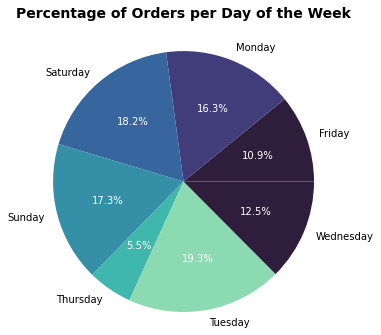

In [109]:
palette = sns.color_palette("mako")
labels_pie = data_copy.groupby('Day').count()['Order ID'].index
data_pie = data_copy.groupby('Day').count()['Order ID']

fig1,ax1 = plt.subplots()
pat, txts, autopcts = ax1.pie(x = data_pie, labels = labels_pie, autopct='%1.1f%%', colors = palette, radius = 1.5)
plt.setp(autopcts, **{'color':'white', 'fontsize':10})
plt.setp(txts, **{'color':'black','fontsize':10})
ax1.set_title("Percentage of Orders per Day of the Week", fontdict = {'fontsize': 14,  'fontweight': 'bold'}, pad = 55)
plt.show()

<p> We can see from the graph that the sales were greater on Tuesdays and lower on Thursdays. </p>

##### Q: What are the best months for sales?

In [40]:
pd.unique(sales_data['Order Date'].dt.year) # We have data from 2016 to 2018

array([2017, 2016, 2015, 2018], dtype=int64)

In [41]:
data_copy['Year'] = sales_data['Order Date'].dt.year
data_copy

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Day,Year
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,Wednesday,2017
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,Wednesday,2017
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,Monday,2017
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,Tuesday,2016
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,Tuesday,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,Sunday,2017
9796,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,Tuesday,2016
9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,Tuesday,2016
9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,Tuesday,2016


In [218]:
data_copy_2015 = data_copy[data_copy['Year'] == 2015].copy()
data_copy_2016 = data_copy[data_copy['Year'] == 2016].copy()
data_copy_2017 = data_copy[data_copy['Year'] == 2017].copy()
data_copy_2018 = data_copy[data_copy['Year'] == 2018].copy()

In [219]:
data_copy_2015['Month'] = data_copy_2015['Order Date'].dt.month
data_copy_2016['Month'] = data_copy_2016['Order Date'].dt.month
data_copy_2017['Month'] = data_copy_2017['Order Date'].dt.month
data_copy_2018['Month'] = data_copy_2018['Order Date'].dt.month

In [116]:
data_copy_2015.Month = data_copy_2015.Month.replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})
data_copy_2016.Month = data_copy_2016.Month.replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})
data_copy_2017.Month = data_copy_2017.Month.replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})
data_copy_2018.Month = data_copy_2018.Month.replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

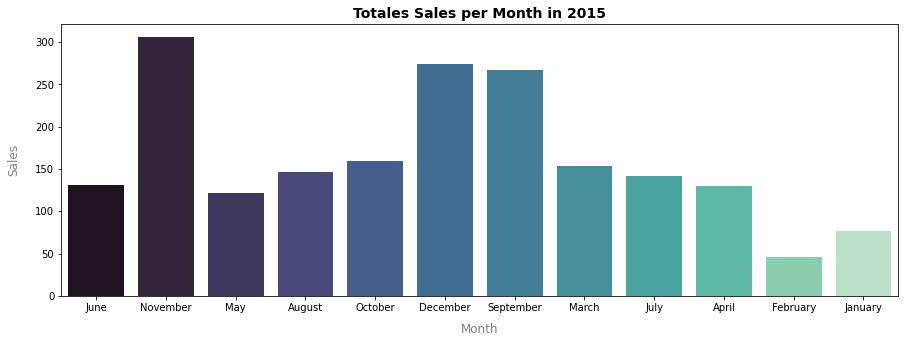

In [217]:
plt.figure(figsize = (15, 5))
ax = sns.countplot(x= data_copy_2015['Month'], palette = 'mako')
ax.set_title('Totales Sales per Month in 2015',fontdict = {'fontsize': 14,  'fontweight': 'bold'})
plt.ylabel('Sales', fontdict = {'fontsize': 12, 'color': 'grey'}, labelpad = 15)
plt.xlabel('Month', fontdict = {'fontsize': 12, 'color': 'grey'}, labelpad = 10)
plt.show()

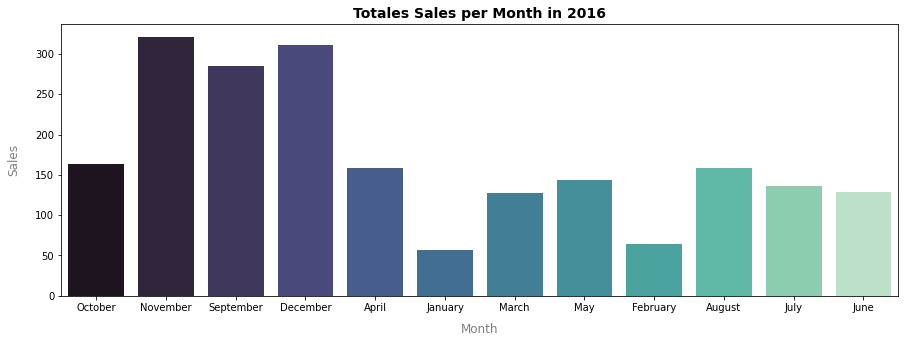

In [161]:
plt.figure(figsize = (15, 5))
ax = sns.countplot(x=data_copy_2016['Month'], palette = 'mako')
ax.set_title('Totales Sales per Month in 2016',fontdict = {'fontsize': 14,  'fontweight': 'bold'})
plt.ylabel('Sales', fontdict = {'fontsize': 12, 'color': 'grey'}, labelpad = 15)
plt.xlabel('Month', fontdict = {'fontsize': 12, 'color': 'grey'}, labelpad = 10)
plt.show()

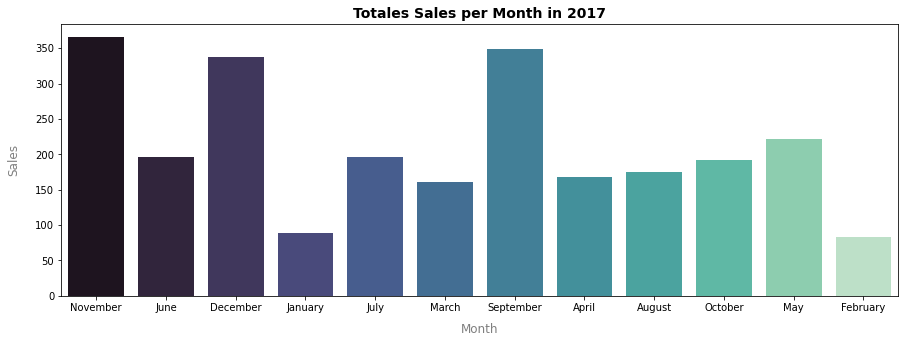

In [160]:
plt.figure(figsize = (15, 5))
ax = sns.countplot(x=data_copy_2017['Month'], palette = 'mako')
ax.set_title('Totales Sales per Month in 2017',fontdict = {'fontsize': 14,  'fontweight': 'bold'})
plt.ylabel('Sales', fontdict = {'fontsize': 12, 'color': 'grey'}, labelpad = 15)
plt.xlabel('Month', fontdict = {'fontsize': 12, 'color': 'grey'}, labelpad = 10)
plt.show()

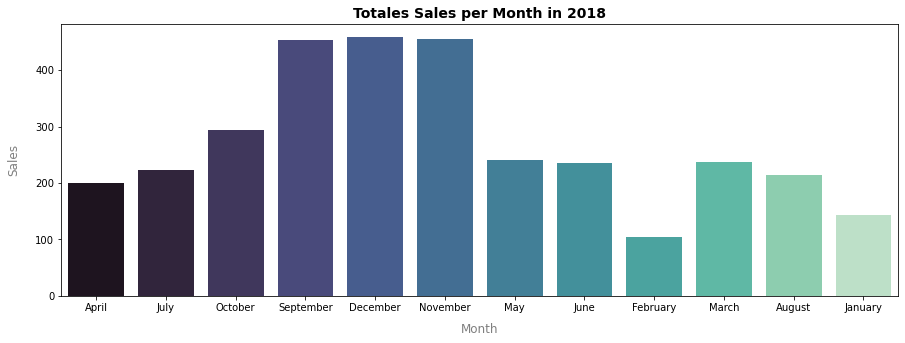

In [159]:
plt.figure(figsize = (15, 5))
ax = sns.countplot(x=data_copy_2018['Month'], palette = 'mako')
ax.set_title('Totales Sales per Month in 2018',fontdict = {'fontsize': 14,  'fontweight': 'bold'})
plt.ylabel('Sales', fontdict = {'fontsize': 12, 'color': 'grey'}, labelpad = 15)
plt.xlabel('Month', fontdict = {'fontsize': 12, 'color': 'grey'}, labelpad = 10)
plt.show()

<p> We can see from the graphs that, in general, the best month for sales were November, December, and September. </p>

In [48]:
# Now, we want to see the evolution of sales through the years:
data_year = data_copy.groupby('Year').sum()
data_year['Sales'] = data_year['Sales'].round(1)

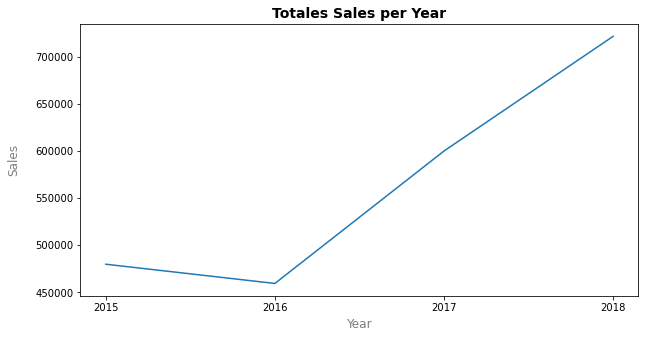

In [164]:
import matplotlib.ticker as ticker # Para modificar el eje de las Y

plt.figure(figsize = (10, 5))
ax = sns.lineplot(data =data_year, x="Year", y="Sales")
ax.set_title('Totales Sales per Year',fontdict = {'fontsize': 14,  'fontweight': 'bold'})
ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) # Hacemos que aparezcan el 2015, 2016, 2017 y 2018, y no como float. 
plt.ylabel('Sales', fontdict = {'fontsize': 12, 'color': 'grey'}, labelpad = 15)
plt.xlabel('Year', fontdict = {'fontsize': 12, 'color': 'grey'}, labelpad = 5)
plt.show()

<p> Sales started to improve by the year 2016 onwards. </p>

##### Q: Which state make the highest revenue?

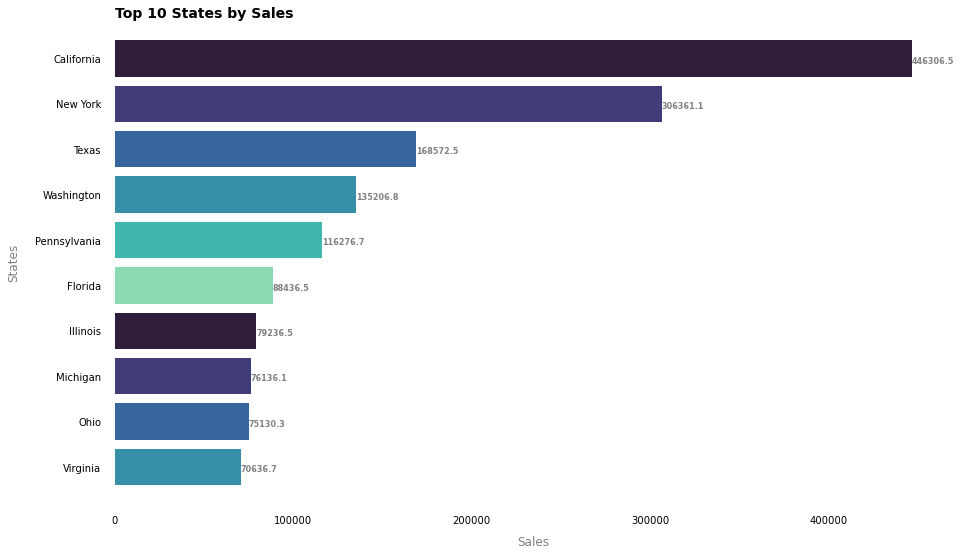

In [165]:
sales_state = sales_data.groupby('State').sum().sort_values(by = 'Sales', ascending=False).head(10).round(1)

palette = sns.color_palette("mako")
fig, ax = plt.subplots(figsize =(15, 9))
ax.barh(sales_state.index, sales_state['Sales'], color = palette)
# Sacamos bordes: 
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
# Sacamos las marcas del eje x e y:
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Agregamos márgenes:
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
# Mostramos los máximos de forma descendente:
ax.invert_yaxis() 
# Agregamos etiquetas de datos: 
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 8, fontweight ='bold',
             color ='gray')

plt.ylabel('States', fontdict = {'fontsize': 12, 'color': 'grey'}, labelpad = 15)
plt.xlabel('Sales', fontdict = {'fontsize': 12, 'color': 'grey'}, labelpad = 10)
# Plot Title:
ax.set_title("Top 10 States by Sales", fontdict = {'fontsize': 14,  'fontweight': 'bold'}, loc = 'left', pad = 0.5)
plt.show()

<p> We can see from the graph that the state which generated the highest revenue was California and in second place New York.</p>

##### Q: Which client make the highest revenue?

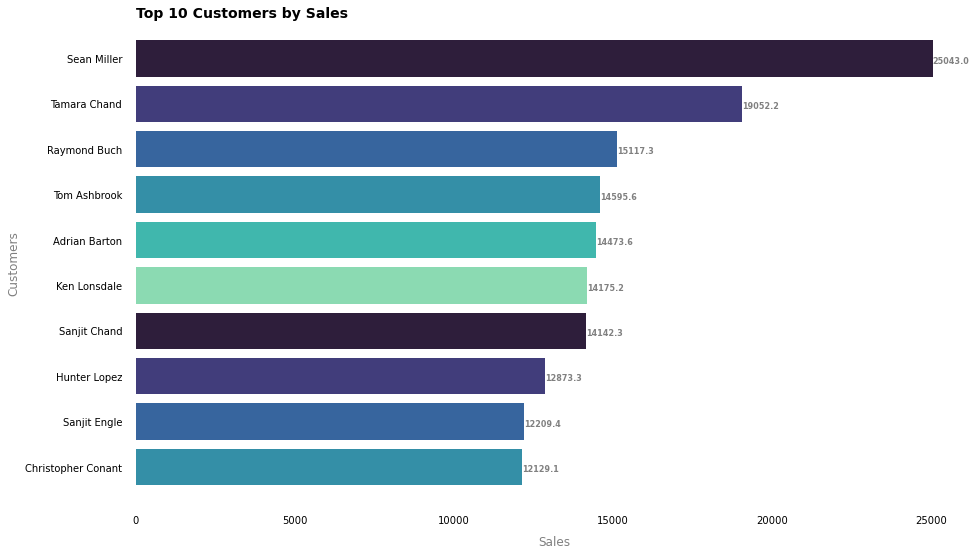

In [168]:
sales_client = sales_data.groupby(['Customer ID', 'Customer Name']).sum().sort_values(by = 'Sales', ascending=False).head(10).round(1)
sales_client.reset_index(inplace = True)
palette = sns.color_palette("mako")
fig, ax = plt.subplots(figsize =(15, 9))
ax.barh(sales_client['Customer Name'], sales_client['Sales'], color = palette)
# Sacamos bordes: 
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
# Sacamos las marcas del eje x e y:
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Agregamos márgenes:
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
# Mostramos los máximos de forma descendente:
ax.invert_yaxis() 
# Agregamos etiquetas de datos: 
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 8, fontweight ='bold',
             color ='gray')

plt.ylabel('Customers', fontdict = {'fontsize': 12, 'color': 'grey'}, labelpad = 5)
plt.xlabel('Sales', fontdict = {'fontsize': 12, 'color': 'grey'}, labelpad = 10)
# Plot Title:
ax.set_title("Top 10 Customers by Sales", fontdict = {'fontsize': 14,  'fontweight': 'bold'}, loc = 'left', pad = 0.5)
plt.show()

<p> We can see from the graph that the customer who generated the highest revenue was Sean Miller and in second place Tamara Chand.</p>

##### Q: Which product make the highest revenue?

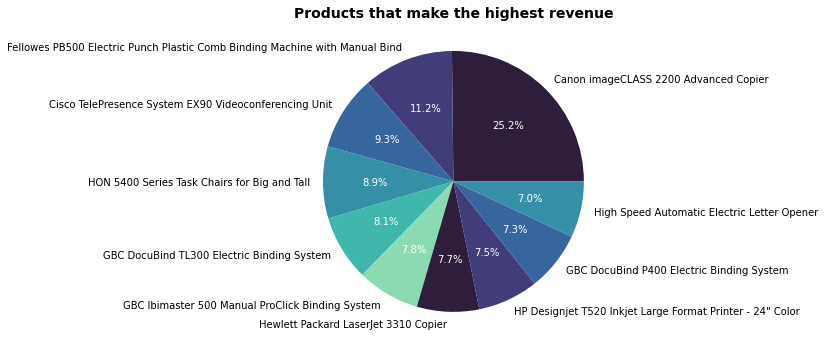

In [105]:
#  We´ll see which products make the highest revenue:
sales_product = sales_data.groupby(['Product ID', 'Product Name']).sum().sort_values(by = 'Sales', ascending=False).head(10).round(1)
sales_product.reset_index(inplace = True)

palette = sns.color_palette("mako")
labels_pie = sales_product['Product Name']

fig, ax = plt.subplots()
pat, txts, autopcts = ax.pie(x = sales_product['Sales'], labels = labels_pie, autopct='%1.1f%%', colors = palette, radius = 1.5)
plt.setp(autopcts, **{'color':'white', 'fontsize':10})
plt.setp(txts, **{'color':'black','fontsize':10})
ax.set_title("Products that make the highest revenue", fontdict = {'fontsize': 14,  'fontweight': 'bold'}, pad = 55)
plt.show()

<p> We can see that the most sold product was the Canon imageCLASS 2200 Advanced Copier and, at the second place, the Fellowes PB500 Electric Punch Plastic Comb Biding Machine with Manual Bind. </p>

##### Q: Which category (and sub - category) make the highest revenue?

In [226]:
subcat = sales_data.groupby(['Category', 'Sub-Category']).sum().sort_values(by = 'Sales', ascending=False).head(10).round(1)
subcat = subcat[['Sales']].astype(int)

In [230]:
subcat = subcat.sort_values(by = 'Category')
subcat.reset_index(inplace = True)

In [233]:
subcat_total = subcat.groupby(['Category']).sum()
subcat_total
subcat_total.reset_index(inplace = True)

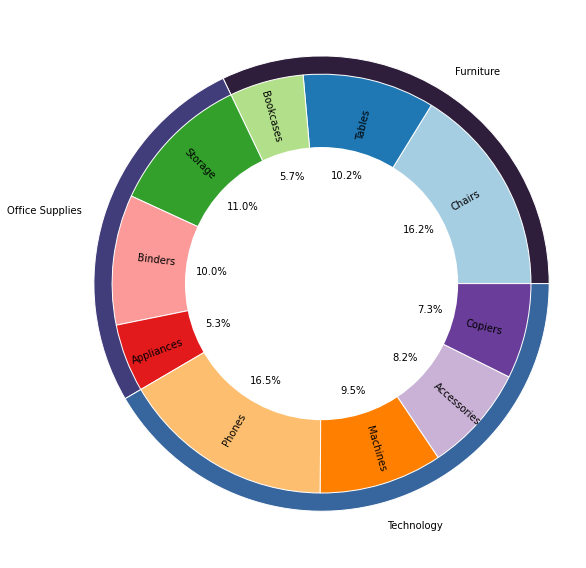

In [267]:
plt.rcParams["figure.figsize"] = (8,8) # width and height of figure is defined in inches

fig, ax = plt.subplots()
ax.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle
width = 0.08
palette_1 = sns.color_palette("Paired")
palette_2 = sns.color_palette('mako')

# Graphs
ax.pie(subcat_total['Sales'], radius=1, labels=subcat_total['Category'],colors=palette_2,wedgeprops=dict(edgecolor='w'))
ax.pie(subcat['Sales'], radius=1-width, labels=subcat['Sub-Category'],autopct= '%1.1f%%',labeldistance=0.7,colors=palette_1,wedgeprops=dict(edgecolor='w'), pctdistance=0.53,rotatelabels =True)

# Rotate fractions
fraction_text_list = pie2[2]
for text in fraction_text_list: 
    text.set_rotation(315) # rotate the autopct values
centre_circle = plt.Circle((0,0),0.6,fc='white') # Draw a circle on the pie chart
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

# the graph was made from this project "https://www.kaggle.com/code/maheshchandrajoshi/exploratory-data-analysis-on-superstore-sales", and i tried to change it a little bit. 

<p> We can see, from the graph, that the highest sales were from the Technology category and, in particular, the phone sub-category.</p> 